In [1]:
from RLA.easy_plot.plot_func import plot_res_func
import os
perf_map = {
    "halfcheetah_medium": 0.423,
    "halfcheetah_medium_expert": 0.633,
    "halfcheetah_random": 0.354,
    "halfcheetah_mixed": 0.531,
    "hopper_medium": 0.28,
    "hopper_medium_expert": 0.237,
    "hopper_random": 0.117,
    "hopper_mixed": 0.675,
    "walker2d_medium": 0.178,
    "walker2d_medium_expert": 0.446,
    "walker2d_random": 0.136,
    "walker2d_mixed": 0.446,
}
neo_per_map={
    'halfcheetah_low': 4741.1,
    'halfcheetah_medium': 7534.7,
    'halfcheetah_high': 7994.1,
    'walker2d_low': 599.4,
    'walker2d_medium': 2051.9,
    'walker2d_high': 924.0,
    'hopper_low': 209.9,
    'hopper_medium': 39.0,
    'hopper_high': 382.1,
    
}

def key_to_legend_fn(key_list, y_name):
    for i in range(len(key_list)):
        if "model_suffix" in key_list[i]:
            key_list[i] = key_list[i].replace("model_suffix", "m")
        if "length" in key_list[i]:
            key_list[i] = key_list[i].replace("length", "H") 
        if "penalty_coeff" in key_list[i]:
            key_list[i] = key_list[i].replace("penalty_coeff", "lambda")
    return " ".join(key_list)


check regs /Users/didi/project/MAPLE/log/v2_examples.config.d4rl.walker2d_medium_expert/2022/01/0[14]/*. log found: 
/Users/didi/project/MAPLE/log/v2_examples.config.d4rl.walker2d_medium_expert/2022/01/04/09-30-38-583144 10.83.150.23 &info=test-4&model_suffix=200&penalty_coeff=0.25&length=20&maple_200=True&run_params.seed=8&penalty_clip=20
/Users/didi/project/MAPLE/log/v2_examples.config.d4rl.walker2d_medium_expert/2022/01/01/15-38-56-149640 10.83.150.44 &info=test-4&model_suffix=200&penalty_coeff=0.25&length=20&maple_200=True&run_params.seed=88&penalty_clip=20
/Users/didi/project/MAPLE/log/v2_examples.config.d4rl.walker2d_medium_expert/2022/01/01/15-42-56-985568 10.83.150.44 &info=test-4&model_suffix=200&penalty_coeff=0.25&length=20&maple_200=True&run_params.seed=888&penalty_clip=20
---- load dataset 3---- 
--- complete process ---


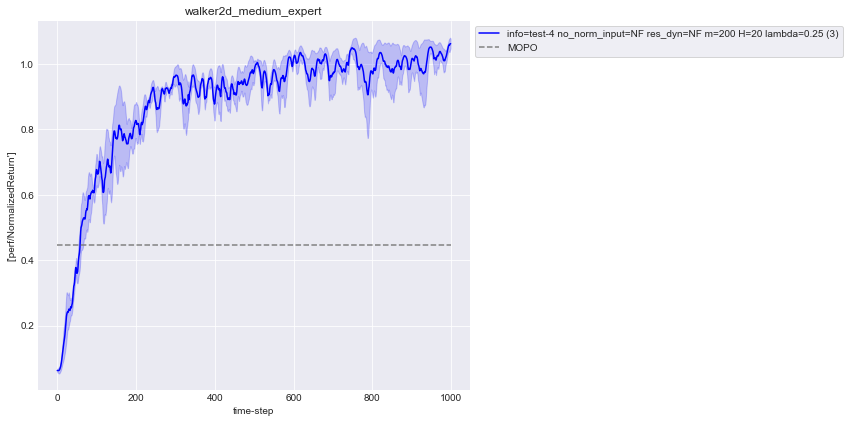

In [2]:
env_name='walker2d'
task = f'{env_name}_medium_expert'

title_name = task
prefix_dir = f'{os.getcwd()}/log/v2_examples.config.d4rl.{task}'
_ = plot_res_func(prefix_dir, regs=[
                "2022/01/0[14]/*",], 
                  
              param_keys=[ 'info','no_norm_input', 'res_dyn', "model_suffix", "length", 'penalty_coeff'], 
#               value_keys=["model/penalty_ret"],
            
              value_keys=["perf/NormalizedReturn"],
              resample=1024,
              bound_line=[[perf_map[task], 'grey', '--', 'MOPO']],
              smooth_step=5,
#              x_bound=2000,
#               bound_line=[[perf_map[task], 'grey', '--', 'MOPO']],
              legend_outside=True,
              key_to_legend_fn=key_to_legend_fn,
              title=title_name, 
              show_number=True,
              pretty=False,
#               save_name = "res" + title_name.replace(" ", "_").replace(",", "_") + '.pdf',
              vary_len_plot=False,
              shaded_range=False,
#               xlabel="epochs",
#               ylabel="normalized return",
              figsize=(7,6),)
